In [0]:
#Qianwen Wang
#ALY 6140 - Fall 2019
#Last Updated: 11/24/2019

In [0]:
!pip install --q quandl


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime
import quandl
import pandas_datareader as pdr
import statsmodels.api as sm


quandl.ApiConfig.api_key = "qAsFMWmHH7ppG5G7VvuG"
plt.style.use('seaborn-white')
plt.rcParams["figure.figsize"] = (18,6)
start_date = "2000-01-01"
end_date = "2019-11-01"

In [0]:
def shade_recessions_n_stuff():
  if start_date < "2007-01-01":
    ax.axvspan("2007-12", "2009-06", alpha=0.6, color='gray') #Great Recession ("Financial Crisis")
  if start_date < "2001-01-01":
    ax.axvspan("2001-03", "2001-11", alpha=0.6, color='gray') #Early 2000's Recession ("Dot Com Bubble")

In [0]:
#df_truck=pd.read_csv("TRUCKD11.csv",index_col=0)
truck_data = quandl.get("FRED/TRUCKD11", start_date = start_date, end_date = end_date)
truck_data.columns = ['TRUCKD11']
df_truck=truck_data.copy()
df_truck.head(3)

In [11]:
#df_sp500=pd.read_csv("SP500.csv",index_col=0)
spy_data_temp = pdr.DataReader('SPY', 'yahoo', start_date, end_date)
spy_data_temp2 = spy_data_temp['Adj Close']
spy_data_daily_temp = pd.DataFrame(spy_data_temp2)
spy_data_daily_temp.columns = ['SPY']
df_sp500 = spy_data_daily_temp.copy()
df_sp500.head(3)

,SPY
Date,
2000-01-03,100.470520
2000-01-04,96.541473
2000-01-05,96.714218


In [0]:
df_truck['log']=np.log(df_truck['TRUCKD11'])
df_sp500['log']=np.log(df_sp500['SPY'])

In [13]:
df_truck.head()

,TRUCKD11,log
Date,,
2000-01-01,80.2,4.384524
2000-02-01,79.7,4.378270
2000-03-01,74.1,4.305416
2000-04-01,72.8,4.287716
2000-05-01,73.0,4.290459


In [14]:
df_sp500.head()

,SPY,log
Date,,
2000-01-03,100.470520,4.609864
2000-01-04,96.541473,4.569973
2000-01-05,96.714218,4.571760
2000-01-06,95.159882,4.555558
2000-01-07,100.686371,4.612010


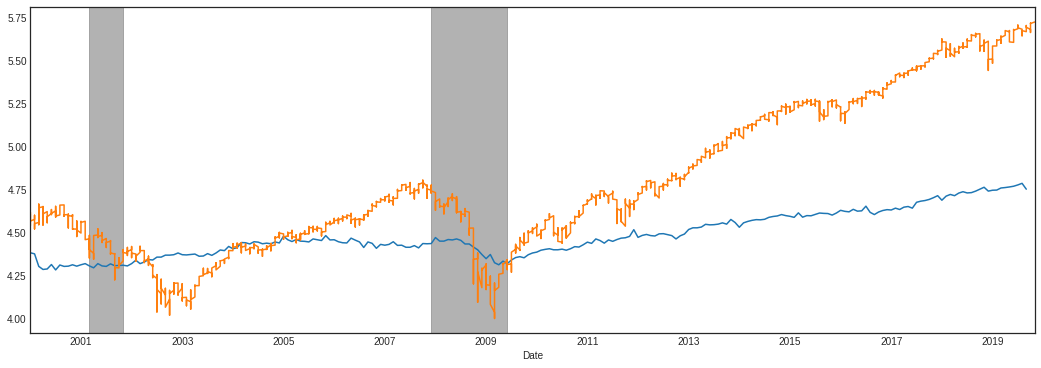

In [15]:
ax = df_truck['log'].plot()
df_sp500['log'].plot(ax=ax)
shade_recessions_n_stuff()

In the first recession sp500 went down more than the truck, in the second recession both line went down. I think the information useful, but we should run the correlattion to see if they corrlate with each other 

## **PART2**

In [16]:
print(df_sp500)


                   SPY       log
Date                            
2000-01-03  100.470520  4.609864
2000-01-04   96.541473  4.569973
2000-01-05   96.714218  4.571760
2000-01-06   95.159882  4.555558
2000-01-07  100.686371  4.612010
...                ...       ...
2019-10-28  303.299988  5.714722
2019-10-29  303.209991  5.714426
2019-10-30  304.140015  5.717488
2019-10-31  303.329987  5.714821
2019-11-01  306.140015  5.724043

[4991 rows x 2 columns]


In [37]:
df_sp500_ma=pd.DataFrame(index=df_sp500.index)
df_sp500_ma['SMA200'] = df_sp500['SPY'].rolling(200).mean()
df_sp500_ma['SMA20'] = df_sp500['SPY'].rolling(20).mean()
df_sp500_ma['SMA50'] = df_sp500['SPY'].rolling(50).mean()
df_sp500_ma['SMA100'] = df_sp500['SPY'].rolling(100).mean()
df_sp500_ma['SPY']=df_sp500['SPY']
df_sp500_ma.head(200)

,SMA200,SMA20,SMA50,SMA100,SPY
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,100.470520
2000-01-04,NaN,NaN,NaN,NaN,96.541473
2000-01-05,NaN,NaN,NaN,NaN,96.714218
2000-01-06,NaN,NaN,NaN,NaN,95.159882
2000-01-07,NaN,NaN,NaN,NaN,100.686371
...,...,...,...,...,...
2000-10-10,NaN,100.170084,102.244235,101.713565,95.823074
2000-10-11,NaN,99.752993,102.147037,101.686358,95.018410
2000-10-12,NaN,99.191343,101.992448,101.642803,92.647827


In [0]:
def shade_recessions2():
  if start_date < "2007-01-01":
    plt.axvspan("2007-12", "2009-06", alpha=0.6, color='gray') #Great Recession ("Financial Crisis")
  if start_date < "2001-01-01":
    plt.axvspan("2001-03", "2001-11", alpha=0.6, color='gray') #Early 2000's Recession ("Dot Com Bubble")

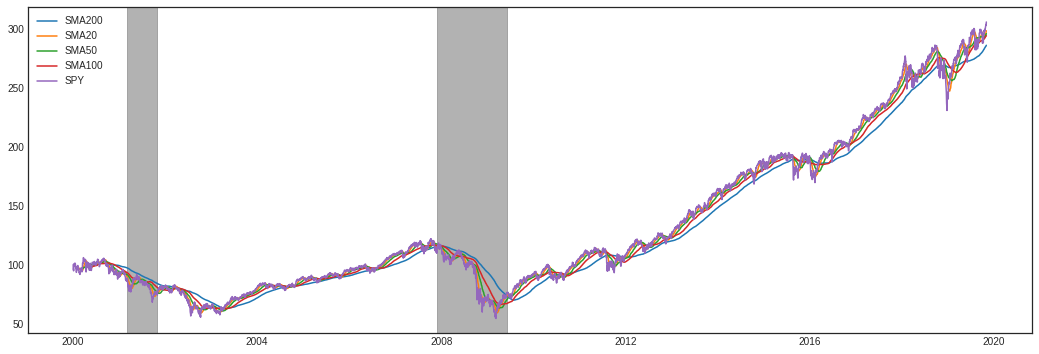

In [39]:
plt.plot(df_sp500_ma)
plt.legend(df_sp500_ma.columns)
shade_recessions2()

i think the information is useful, because the line curve looks alike.

## Part **3**

the 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity has no corrlation with sp500

In [40]:
tyy_data = quandl.get("FRED/T10Y2Y", start_date = start_date, end_date = end_date)
tyy_data.columns = ['T10Y2Y']
df_tyy = tyy_data.copy() 
df_tyy.head(3)

,T10Y2Y
Date,
2000-01-03,0.20
2000-01-04,0.19
2000-01-05,0.24


In [0]:
df_sp500['SPY return']=df_sp500['SPY'].pct_change()*100


In [0]:
df_sp500_monthly=df_sp500['SPY return'].resample('M').mean()


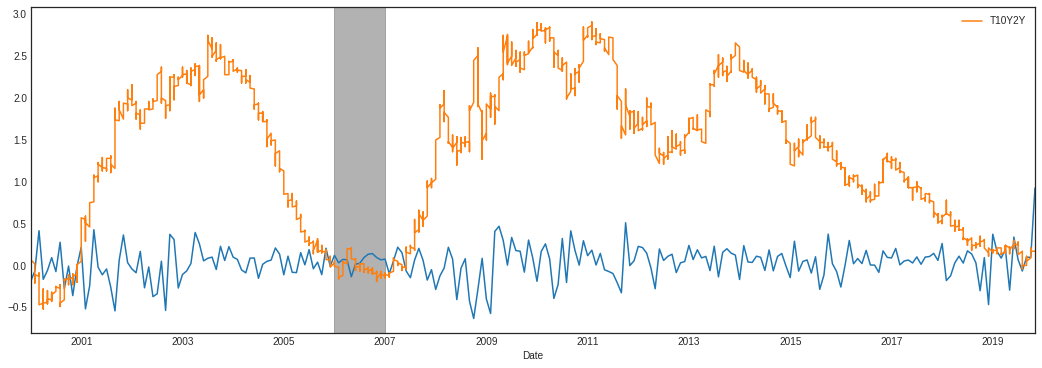

In [43]:

ax=df_sp500_monthly.plot()
(df_tyy).plot(ax=ax)

plt.axvspan("2006", "2007", alpha=0.6, color='gray')

after the plot, i think the information is not useful. 